# **SUPPORT VECTOR REGRESSION (SVR)**

## **Data Preprocessing**

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [ ]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(X)
print()
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

print(X)
print()
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## **Actual Model**

Testing the SVR on the whole dataset

In [ ]:
from sklearn.svm import SVR

regressor = SVR(kernel = "rbf")
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting the salary of a position equivalent to the level 6.5<br>(Reverse Feature Scaling to get the original scale)

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

Visualizing the SVR results

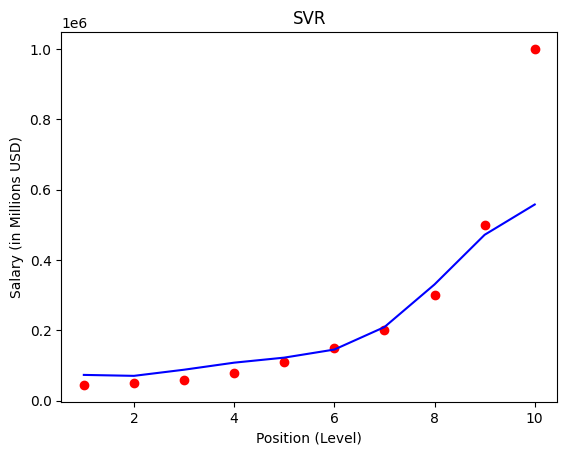

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = "blue")
plt.title("SVR")
plt.xlabel("Position (Level)")
plt.ylabel("Salary (in Millions USD)")
plt.show()

Visualizing the SVR (for higher resolution and a smoother curve)

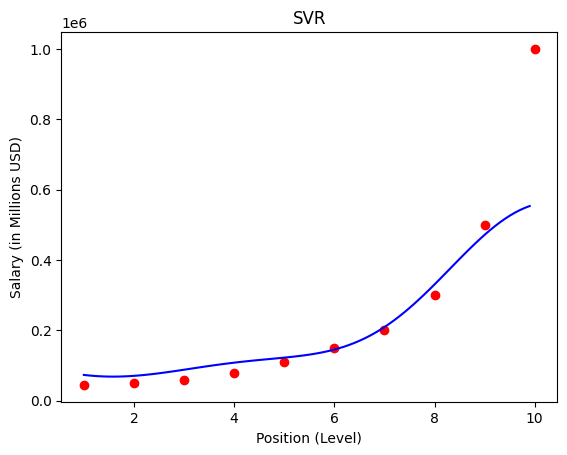

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color = 'blue')
plt.title('SVR')
plt.xlabel('Position (Level)')
plt.ylabel('Salary (in Millions USD)')
plt.show()

# **DECISION TREE REGRESSION**

## **Data Preprocessing**

Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [ ]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## **Actual Model**

Training the Decision Tree Regression model on the whole dataset

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

Predicting a new result

In [ ]:
regressor.predict([[6.5]])

array([150000.])

Visualizing the Decision Tree Regression results (higher resolution)

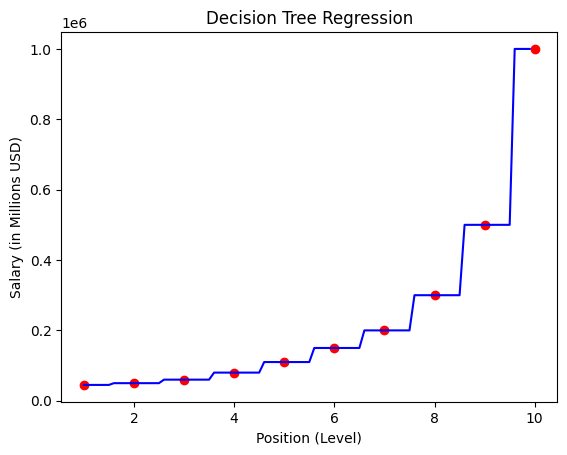

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = "blue")
plt.title('Decision Tree Regression')
plt.xlabel('Position (Level)')
plt.ylabel('Salary (in Millions USD)')
plt.show()

# **RANDOM FOREST REGRESSION**

## **Data Preprocessing**

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## **Actual Model**

Training the Random Forest Regression model on the whole dataset

In [3]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

Predicting a new result

In [4]:
regressor.predict([[6.5]])

array([167000.])

Visualizing the Random Forest Regression results (Higher resolution)

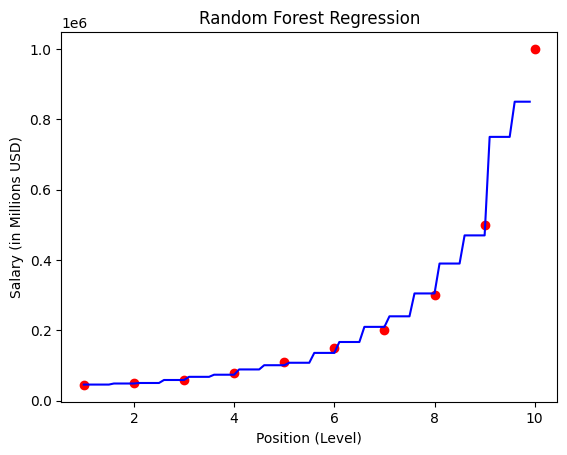

In [6]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = "blue")
plt.title('Random Forest Regression')
plt.xlabel('Position (Level)')
plt.ylabel('Salary (in Millions USD)')
plt.show()